# 

In [64]:
%load_ext autoreload
%autoreload 3

In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import pickle

data_pre_path= "../data/cifar-100/"

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict



# File paths
data_train_path = data_pre_path + 'train'
data_test_path = data_pre_path + 'test'
# Read dictionary
data_train_dict = unpickle(data_train_path)
data_test_dict = unpickle(data_test_path)
# Get data (change the coarse_labels if you want to use the 100 classes)
data_train = data_train_dict[b'data']
label_train = np.array(data_train_dict[b'coarse_labels'])
data_test = data_test_dict[b'data']
label_test = np.array(data_test_dict[b'coarse_labels'])

NameError: name 'np' is not defined

In [63]:
def load_curfar_100_train():
    """Return images as (n_image, pixel_x, pixel_y, n_color)"""
    def unpickle():
        train_path = "../data/cifar-100/train"
        from glob import glob
        import pickle
        with open(train_path, 'rb') as fo:
            return pickle.load(fo, encoding='bytes')
    
    train = unpickle()
    train.keys()
    
    labels = np.asarray(train[b"coarse_labels"])
    data = train[b"data"]
    data = data.reshape(-1, 3, 32, 32)
    data = np.swapaxes(data, 1, 3)
    data = np.swapaxes(data, 2, 1)
    return data


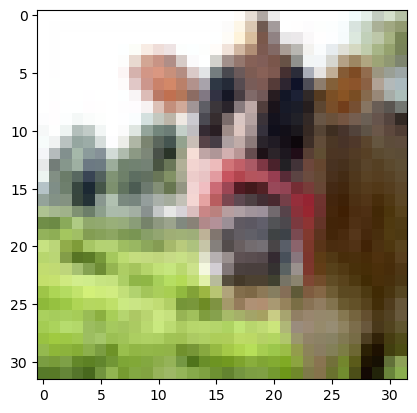

In [61]:
single_img = data[0]
plt.imshow(single_img)

In [19]:
images = unpickle()
im = next(images)

FileNotFoundError: [Errno 2] No such file or directory: '../data/cifar-100/train'

In [13]:
im[b"data"].shape

(10000, 3072)

In [11]:
print("wow")

wow


In [66]:
import numpy as np
import matplotlib.pyplot as plt

import generate

In [71]:
data = generate.load_cifar_100_train()

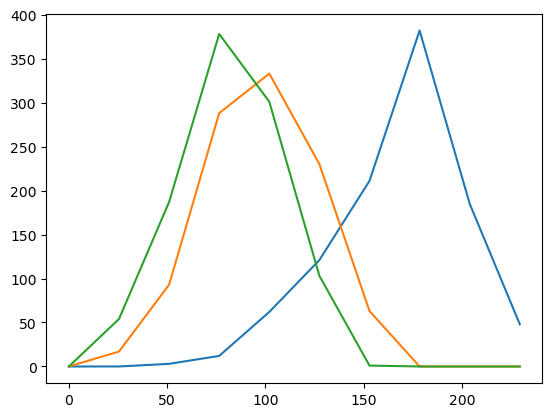

In [90]:
n_bins = 10
n_colors = 3
img_idx = 101
single_img = data[img_idx].reshape(-1, n_colors)
for color in range(n_colors):
    counts, edges = np.histogram(single_img[:,color], bins=n_bins, range=(0, 255))
    plt.plot(edges[:-1], counts)

In [104]:
single_line = data.reshape(-1, 32**2, 3)
single_line.shape

(50000, 1024, 3)

In [110]:
from tqdm.auto import tqdm

n_images = single_line.shape[0]
hists = np.empty((n_images, n_colors ,n_bins))
for image_idx, image in enumerate(tqdm(single_line)):
    for color in range(n_colors):
        hists[image_idx, color, :], _ = np.histogram(image[:,color], bins=n_bins, range=(0,255))
    

  0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
from tqdm.auto import tqdm

n_images = single_line.shape[0]
hists = np.empty((n_images, n_colors ,n_bins))
for image_idx, image in enumerate(tqdm(single_line)):
    hists[image_idx, color, :], _ = np.histogramdd(image[:,color], bins=n_bins, range=(0,255))
   j 

In [165]:
n_bins = 10

images = generate.load_cifar_100_train()
n_images = images.shape[0]
n_colors = images.shape[-1]
images = images.reshape(n_images, -1, n_colors)
hists = np.empty((n_images, n_bins, n_bins, n_bins))

for image_idx in tqdm(range(n_images)):
    hists[image_idx], _ = np.histogramdd(
            images[image_idx], bins=[n_bins]*3, range=[(0, 255),(0, 255),(0, 255)]
        )

normalization_factor = hists.reshape(n_images, -1).sum(axis=-1)
normalization_factor = normalization_factor.reshape(n_images, 1, 1, 1)
hists = hists / normalization_factor

  0%|          | 0/50000 [00:00<?, ?it/s]

(0.0, 10.0)

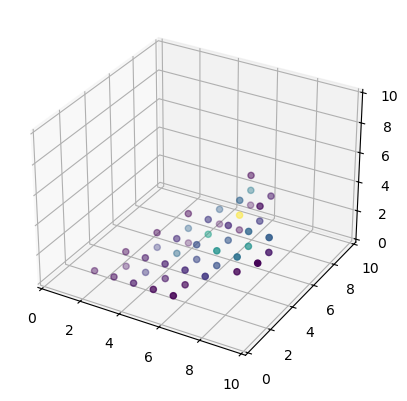

In [168]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

img_idx = 101
h = hists[img_idx]
coords = np.nonzero(h)
counts = h[h>0]

ax.scatter(*coords, c=counts)
plt.xlim(0,n_bins)
plt.ylim(0,n_bins)
ax.set_zlim(0,n_bins)

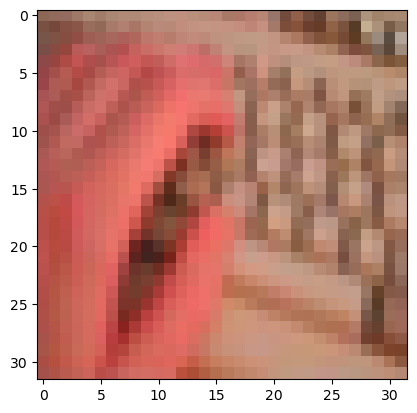

In [169]:
plt.imshow(data[img_idx])

In [92]:
counts, edges = np.histogram(single_img, bins=[n_bins]*3, range=(0, 255))

In [81]:
counts.shape

(2,)